# Proper report of an analysis of variance 

Analysis of variance (ANOVA) is a widely and powerful method to quantify the variance provided by factors when evaluating the variability of a response variable. However, several issues arise when going deeper, as most of studies fail when reporting results based just on the *p-value*. 

Results show be statistically supported by using others parameters such as the **EFFECT SIZE**.

To get a better grasp of this Notebook, I strongly suggest to have knowledge about **Hypothesis Testing** and **Experimental Design**

This example considers a Significance level (**alpha**) of 95%.

In [1]:
#Loading libraries 
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np 
import researchpy as rp
import seaborn #Load Iris data 
import math

import seaborn as sns
import matplotlib.pyplot as plt

#For ANOVA
import statsmodels 
import statsmodels.api as sm #For ANOVA
from statsmodels.formula.api import ols

### Loading data and general overview

In [2]:
df = sns.load_dataset("iris")
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

### Exploratory analysis

Box plots account for a reliable way to illustrate data when there are multiple levels on a factor to be considered (Specie) regarding several predictors. Among the advantages of using boxplots:

- They consider the data distribution
- They provide information about the quartiles, standard deviation, median and skewness. 
- Boxplots consider whether there was or not presence of outliers in the data

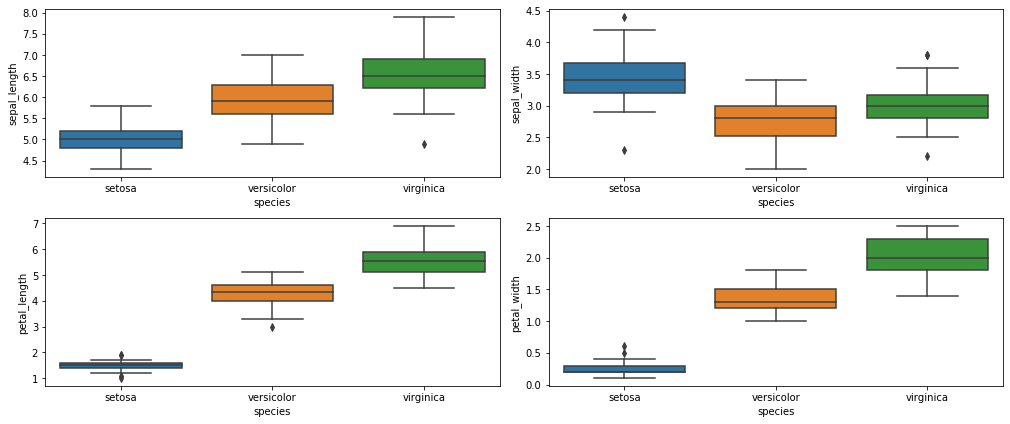

In [13]:
var = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
 
fig, ax = plt.subplots(2,2, figsize=(14,6))
for var, subplot in zip(var, ax.flatten()):
    sns.boxplot(x='species', y=var, data=df, ax=subplot)
fig.tight_layout()
plt.show()

### Analysis of variance

In [ ]:
mod = ols('sepal_length~species', data=df).fit()
aov_table=sm.stats.anova_lm(mod,type=1) #The Type (1 or 2) stands for the priority regarding the Error Type (I or II)

print(aov_table)

In this case, the null hypothesis states that the mean of the *Sepal length* values of three flowers are equal. Since the p-value is 1.669669e-31, which is less than the significance level of 0.05, **we can reject the null hypothesis and conclude that some of the flowers have different means.**


### Effect size (ES) calculation

An effect size refers to the size or magnitude of an effect or result as it would be expected to occur in a population.

There exists two main groups to evalaute this parameter. 

- Association. Statistical methods for quantifying an association between variables (e.g. correlation).
- Difference. Statistical methods for quantifying the difference between variables (e.g. difference between means).

This case will consider the Difference (**d also know as Eta Squared**) approach. Typical reference values for **ES** values are:

- Small: d=0.20
- Medium: d=0.50
- **Large: d=0.80** Preferable


Further information:
- http://phonetics.linguistics.ucla.edu/facilities/statistics/power.htm
- https://www.frontiersin.org/articles/10.3389/fpsyg.2013.00863/full
- https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/One-Way_Analysis_of_Variance_F-Tests_using_Effect_Size.pdf

In [ ]:
esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1]) #Eta Squared
aov_table['EtaSq'] = [esq_sm, 'NaN']
print(aov_table)

Although the ANOVA results showed that the means were significantly different, the effect size was small to modest.  The partial Eta squared was just .61, which means that the factor Species by itself accounted for 60% approximately of the overall (effect+error) variance.

On the other hand, this result also means that the difference between the means is 60% of one standard deviation interpreted as a medium plus 10 per cent effect size.

**To calculate the ES for a factor with TWO levels please look at:**
- https://machinelearningmastery.com/effect-size-measures-in-python/
